<h2> Load Data <h2>

In [1]:
import scanpy as sc
import pandas as pd

adata_path = '/home/nas2/biod/machuanlong/data/integrate/integrate.h5ad'
seq_path = '/home/nas2/biod/machuanlong/data/integrate/overlap_seqs.txt'
ATAC_path= '/home/nas2/biod/machuanlong/data/P22/ATAC/adata_peaks_normalized.h5ad'
H3K27ac_path= '/home/nas2/biod/machuanlong/data/P22/H3K27ac/adata_peaks_normalized.h5ad'

adata = sc.read_h5ad(adata_path)
ATAC = sc.read_h5ad(ATAC_path)
H3K27ac = sc.read_h5ad(H3K27ac_path)
seq = pd.read_csv(seq_path, sep='\t')

/home/machuanlong/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


<h2> Running SpaDC <h2>

In [2]:
import torch
import SpaDC 

SpaDC.train_SpaDC_bc(adata, ATAC, H3K27ac, seq, device=torch.device('cuda:8'))

<h2> Benchmark <h2>

<h3> Umap plots <h3>

/home/machuanlong/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2025-05-28 12:27:09.025850: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-28 12:27:09.093700: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-28 12:27:09.093749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-28 12:27:09.095096: E external/local_xla/xla/stream_e

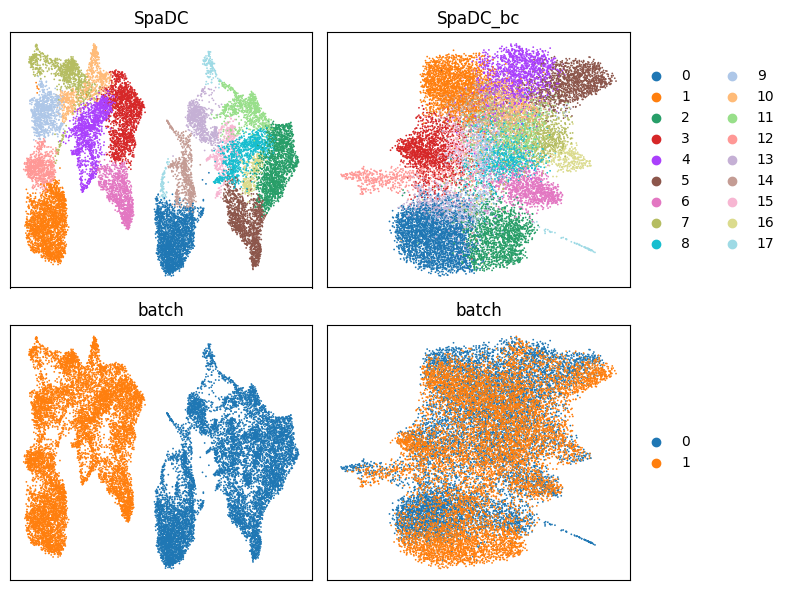

In [3]:
import matplotlib.pyplot as plt

result_path = '/home/nas2/biod/machuanlong/result/integrate_result.h5ad'

result = sc.read_h5ad(result_path)
result.obsm['SpaDC'] = adata.obsm['SpaDC']
result.obsm['SpaDC_bc'] = adata.obsm['SpaDC_bc']

f, ax = plt.subplots(2, 2, figsize=(8, 6))

sc.pp.neighbors(result, use_rep='SpaDC') 
res1, _ = SpaDC.getNClusters(result, 18)
sc.tl.leiden(result, key_added='SpaDC', resolution=res1)
sc.tl.umap(result)
sc.pl.umap(result, color='SpaDC', ax=ax[0, 0], show=False)
sc.pl.umap(result, color='batch', ax=ax[1, 0], show=False)

sc.pp.neighbors(result, use_rep='SpaDC_bc') 
res2, _ = SpaDC.getNClusters(result, 18)
sc.tl.leiden(result, key_added='SpaDC_bc', resolution=res2)
sc.tl.umap(result)
sc.pl.umap(result, color='SpaDC_bc', ax=ax[0, 1], show=False)
sc.pl.umap(result, color='batch', ax=ax[1, 1], show=False)

ax[0, 0].get_legend().remove()
ax[1, 0].get_legend().remove()

ax[0, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[1, 1].set_xlabel('')

ax[0, 0].set_ylabel('')
ax[0, 1].set_ylabel('')
ax[1, 0].set_ylabel('')
ax[1, 1].set_ylabel('')

plt.tight_layout()
# plt.savefig('figures/batch_correction_contrast.png')
plt.show()

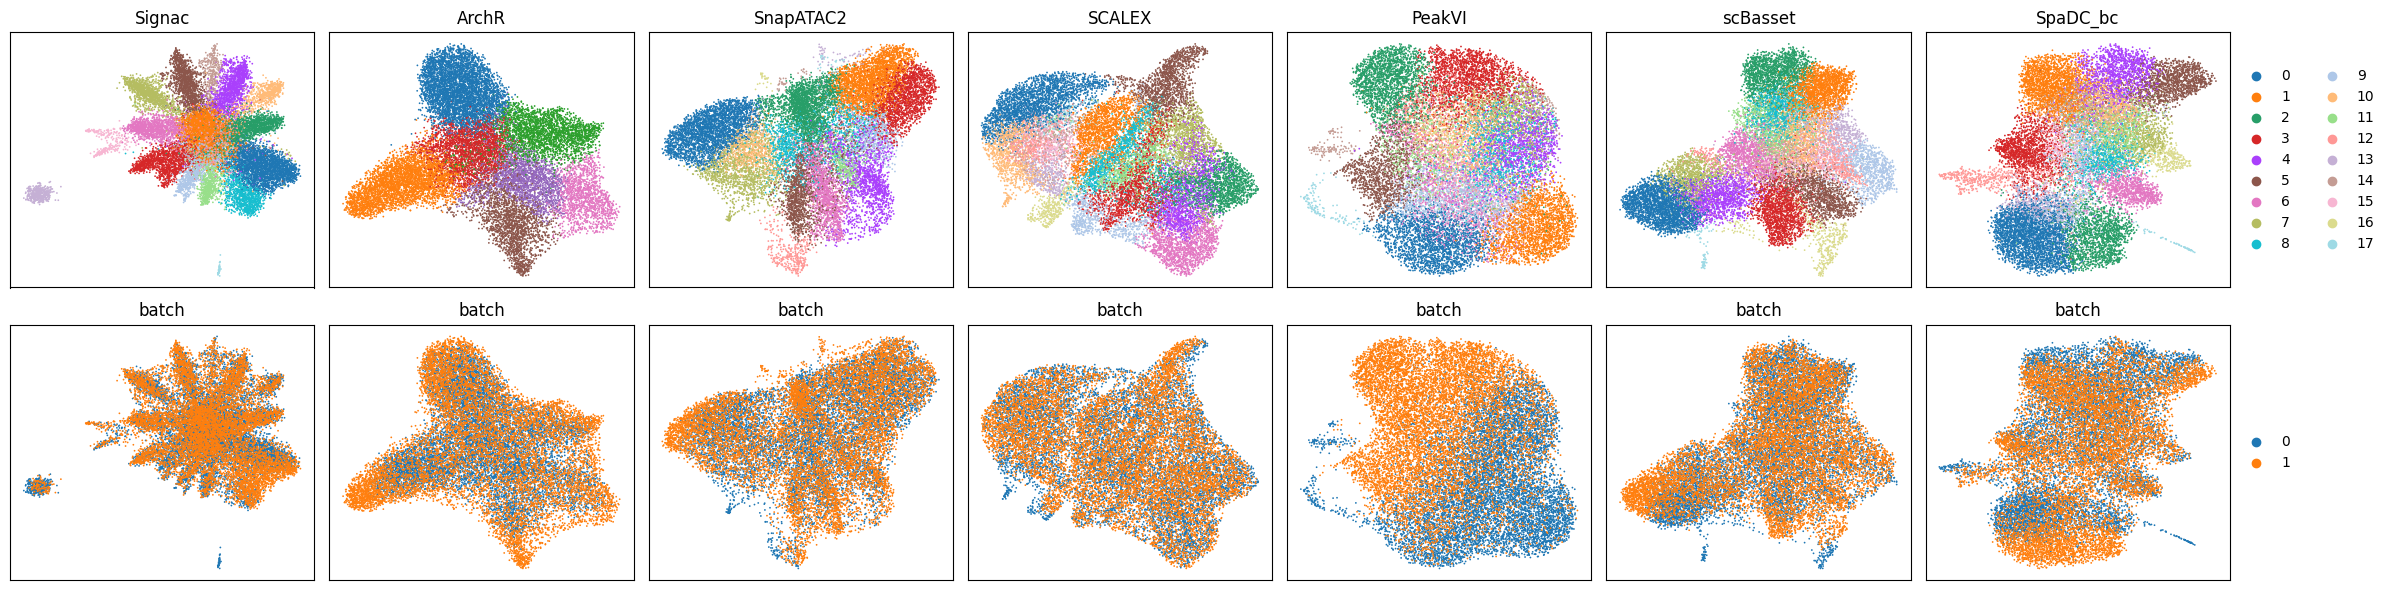

In [4]:
f, ax = plt.subplots(2, 7, figsize=(24, 6))

sc.pp.neighbors(result, use_rep='Signac') 
sc.tl.umap(result)
res1, _ = SpaDC.getNClusters(result, 18)
if res1 == None:
    sc.tl.leiden(result, key_added='Signac')
else:
    sc.tl.leiden(result, key_added='Signac', resolution=res1)
sc.pl.umap(result, color='Signac', ax=ax[0, 0], show=False)
sc.pl.umap(result, color='batch', ax=ax[1, 0], show=False)

sc.pp.neighbors(result, use_rep='ArchR') 
sc.tl.umap(result)
sc.tl.leiden(result, key_added='ArchR')
# res2, _ = SpaDC.getNClusters(result, 18)
# if res2 == None:
#     sc.tl.leiden(result, key_added='ArchR')
# else:
#     sc.tl.leiden(result, key_added='ArchR', resolution=res2)
sc.pl.umap(result, color='ArchR', ax=ax[0, 1], show=False)
sc.pl.umap(result, color='batch', ax=ax[1, 1], show=False)

sc.pp.neighbors(result, use_rep='SnapATAC2') 
sc.tl.umap(result)
res3, _ = SpaDC.getNClusters(result, 18)
if res3 == None:
    sc.tl.leiden(result, key_added='SnapATAC2')
else:
    sc.tl.leiden(result, key_added='SnapATAC2', resolution=res3)
sc.pl.umap(result, color='SnapATAC2', ax=ax[0, 2], show=False)
sc.pl.umap(result, color='batch', ax=ax[1, 2], show=False)

sc.pp.neighbors(result, use_rep='SCALEX') 
sc.tl.umap(result)
res4, _ = SpaDC.getNClusters(result, 18)
if res4 == None:
    sc.tl.leiden(result, key_added='SCALEX')
else:
    sc.tl.leiden(result, key_added='SCALEX', resolution=res4)
sc.pl.umap(result, color='SCALEX', ax=ax[0, 3], show=False)
sc.pl.umap(result, color='batch', ax=ax[1, 3], show=False)

sc.pp.neighbors(result, use_rep='PeakVI') 
sc.tl.umap(result)
res5, _ = SpaDC.getNClusters(result, 18)
if res5 == None:
    sc.tl.leiden(result, key_added='PeakVI')
else:
    sc.tl.leiden(result, key_added='PeakVI', resolution=res5)
sc.pl.umap(result, color='PeakVI', ax=ax[0, 4], show=False)
sc.pl.umap(result, color='batch', ax=ax[1, 4], show=False)

sc.pp.neighbors(result, use_rep='scBasset') 
sc.tl.umap(result)
res6, _ = SpaDC.getNClusters(result, 18)
if res6 == None:
    sc.tl.leiden(result, key_added='scBasset')
else:
    sc.tl.leiden(result, key_added='scBasset', resolution=res6)
sc.pl.umap(result, color='scBasset', ax=ax[0, 5], show=False)
sc.pl.umap(result, color='batch', ax=ax[1, 5], show=False)

sc.pp.neighbors(result, use_rep='SpaDC_bc') 
sc.tl.umap(result)
res7, _ = SpaDC.getNClusters(result, 18)
if res7 == None:
    sc.tl.leiden(result, key_added='SpaDC_bc')
else:
    sc.tl.leiden(result, key_added='SpaDC_bc', resolution=res7)
sc.pl.umap(result, color='SpaDC_bc', ax=ax[0, 6], show=False)
sc.pl.umap(result, color='batch', ax=ax[1, 6], show=False)

# sc.write("result/integrate_result.h5ad", result)

ax[0, 0].get_legend().remove()
ax[0, 1].get_legend().remove()
ax[0, 2].get_legend().remove()
ax[0, 3].get_legend().remove()
ax[0, 4].get_legend().remove()
ax[0, 5].get_legend().remove()
# ax[0, 6].get_legend().remove()
ax[1, 0].get_legend().remove()
ax[1, 1].get_legend().remove()
ax[1, 2].get_legend().remove()
ax[1, 3].get_legend().remove()
ax[1, 4].get_legend().remove()
ax[1, 5].get_legend().remove()
# ax[1, 6].get_legend().remove()

ax[0, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[0, 2].set_xlabel('')
ax[0, 3].set_xlabel('')
ax[0, 4].set_xlabel('')
ax[0, 5].set_xlabel('')
ax[0, 6].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[1, 1].set_xlabel('')
ax[1, 2].set_xlabel('')
ax[1, 3].set_xlabel('')
ax[1, 4].set_xlabel('')
ax[1, 5].set_xlabel('')
ax[1, 6].set_xlabel('')

ax[0, 0].set_ylabel('')
ax[0, 1].set_ylabel('')
ax[0, 2].set_ylabel('')
ax[0, 3].set_ylabel('')
ax[0, 4].set_ylabel('')
ax[0, 5].set_ylabel('')
ax[0, 6].set_ylabel('')
ax[1, 0].set_ylabel('')
ax[1, 1].set_ylabel('')
ax[1, 2].set_ylabel('')
ax[1, 3].set_ylabel('')
ax[1, 4].set_ylabel('')
ax[1, 5].set_ylabel('')
ax[1, 6].set_ylabel('')

plt.tight_layout()
# plt.savefig('figures/p22_integrate_umap.png')
plt.show()

<h3> Spatial plots <h3>

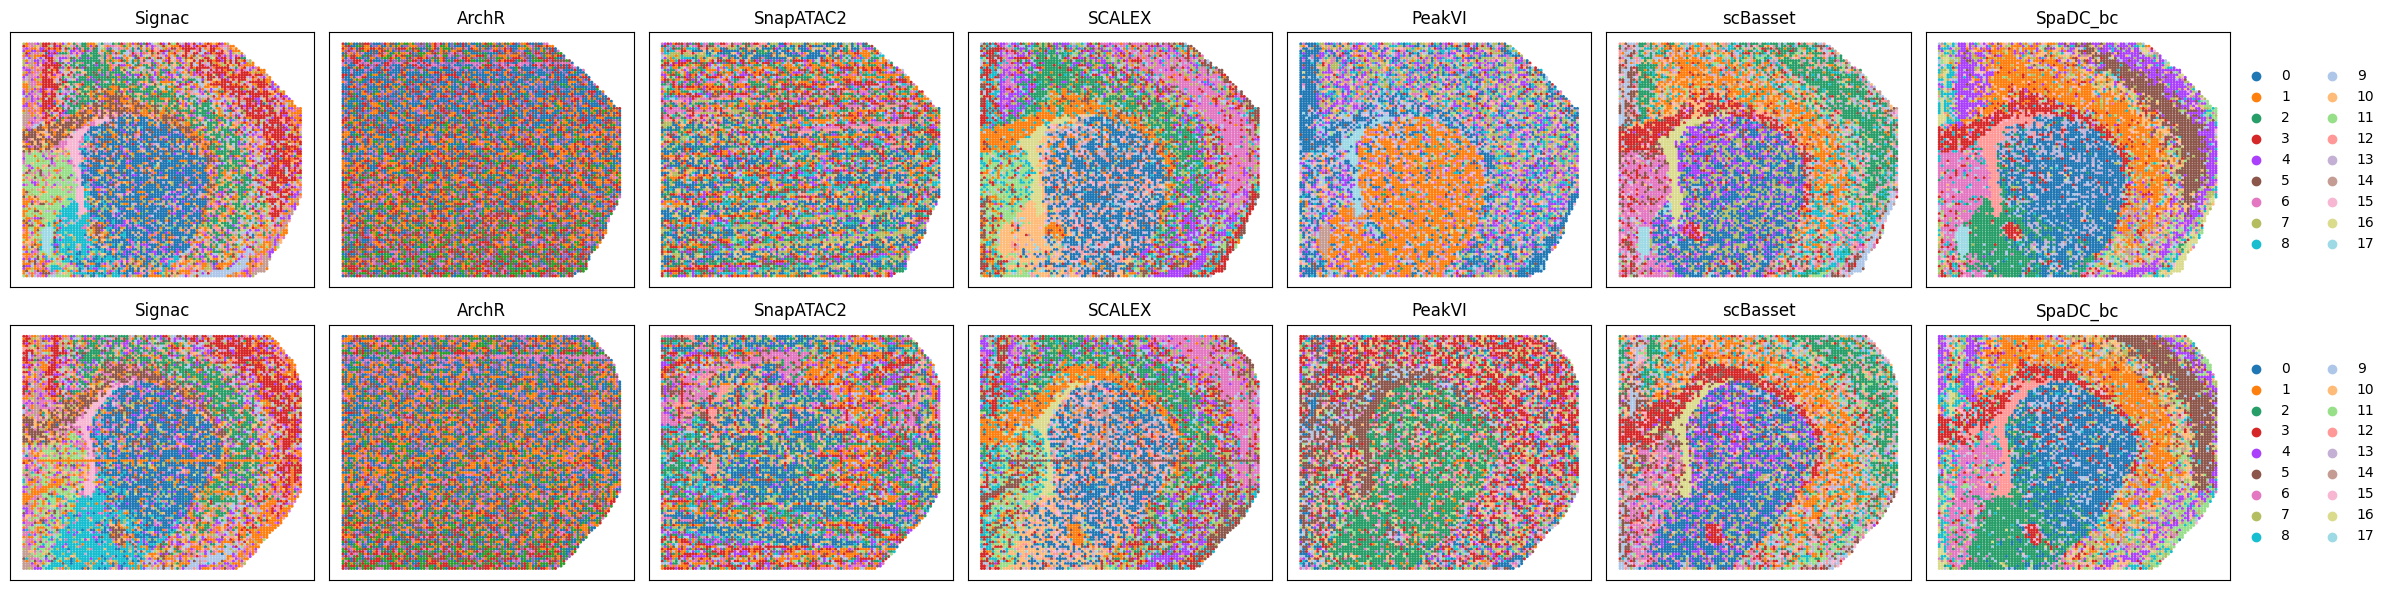

In [5]:
ATAC.obs['Signac'] = result.obs['Signac'][0:ATAC.n_obs].values
H3K27ac.obs['Signac'] = result.obs['Signac'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values
ATAC.obs['ArchR'] = result.obs['ArchR'][0:ATAC.n_obs].values
H3K27ac.obs['ArchR'] = result.obs['ArchR'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values
ATAC.obs['SnapATAC2'] = result.obs['SnapATAC2'][0:ATAC.n_obs].values
H3K27ac.obs['SnapATAC2'] = result.obs['SnapATAC2'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values
ATAC.obs['SCALEX'] = result.obs['SCALEX'][0:ATAC.n_obs].values
H3K27ac.obs['SCALEX'] = result.obs['SCALEX'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values
ATAC.obs['PeakVI'] = result.obs['PeakVI'][0:ATAC.n_obs].values
H3K27ac.obs['PeakVI'] = result.obs['PeakVI'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values
ATAC.obs['scBasset'] = result.obs['scBasset'][0:ATAC.n_obs].values
H3K27ac.obs['scBasset'] = result.obs['scBasset'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values
ATAC.obs['SpaDC_bc'] = result.obs['SpaDC_bc'][0:ATAC.n_obs].values
H3K27ac.obs['SpaDC_bc'] = result.obs['SpaDC_bc'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values

f, ax = plt.subplots(2, 7, figsize=(24, 6))

sc.pl.embedding(ATAC, basis='spatial', color='Signac', size=20, ax=ax[0, 0], show=False)
sc.pl.embedding(H3K27ac, basis='spatial1', color='Signac', size=20, ax=ax[1, 0], show=False)
sc.pl.embedding(ATAC, basis='spatial', color='ArchR', size=20, ax=ax[0, 1], show=False)
sc.pl.embedding(H3K27ac, basis='spatial1', color='ArchR', size=20, ax=ax[1, 1], show=False)
sc.pl.embedding(ATAC, basis='spatial', color='SnapATAC2', size=20, ax=ax[0, 2], show=False)
sc.pl.embedding(H3K27ac, basis='spatial1', color='SnapATAC2', size=20, ax=ax[1, 2], show=False)
sc.pl.embedding(ATAC, basis='spatial', color='SCALEX', size=20, ax=ax[0, 3], show=False)
sc.pl.embedding(H3K27ac, basis='spatial1', color='SCALEX', size=20, ax=ax[1, 3], show=False)
sc.pl.embedding(ATAC, basis='spatial', color='PeakVI', size=20, ax=ax[0, 4], show=False)
sc.pl.embedding(H3K27ac, basis='spatial1', color='PeakVI', size=20, ax=ax[1, 4], show=False)
sc.pl.embedding(ATAC, basis='spatial', color='scBasset', size=20, ax=ax[0, 5], show=False)
sc.pl.embedding(H3K27ac, basis='spatial1', color='scBasset', size=20, ax=ax[1, 5], show=False)
sc.pl.embedding(ATAC, basis='spatial', color='SpaDC_bc', size=20, ax=ax[0, 6], show=False)
sc.pl.embedding(H3K27ac, basis='spatial1', color='SpaDC_bc', size=20, ax=ax[1, 6], show=False)

ax[0, 0].get_legend().remove()
ax[0, 1].get_legend().remove()
ax[0, 2].get_legend().remove()
ax[0, 3].get_legend().remove()
ax[0, 4].get_legend().remove()
ax[0, 5].get_legend().remove()
ax[1, 0].get_legend().remove()
ax[1, 1].get_legend().remove()
ax[1, 2].get_legend().remove()
ax[1, 3].get_legend().remove()
ax[1, 4].get_legend().remove()
ax[1, 5].get_legend().remove()
# ax[1, 6].get_legend().remove()

ax[0, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[0, 2].set_xlabel('')
ax[0, 3].set_xlabel('')
ax[0, 4].set_xlabel('')
ax[0, 5].set_xlabel('')
ax[0, 6].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[1, 1].set_xlabel('')
ax[1, 2].set_xlabel('')
ax[1, 3].set_xlabel('')
ax[1, 4].set_xlabel('')
ax[1, 5].set_xlabel('')
ax[1, 6].set_xlabel('')

ax[0, 0].set_ylabel('')
ax[0, 1].set_ylabel('')
ax[0, 2].set_ylabel('')
ax[0, 3].set_ylabel('')
ax[0, 4].set_ylabel('')
ax[0, 5].set_ylabel('')
ax[0, 6].set_ylabel('')
ax[1, 0].set_ylabel('')
ax[1, 1].set_ylabel('')
ax[1, 2].set_ylabel('')
ax[1, 3].set_ylabel('')
ax[1, 4].set_ylabel('')
ax[1, 5].set_ylabel('')
ax[1, 6].set_ylabel('')

plt.tight_layout()
# plt.savefig('./figures/p22_integrate.png')
plt.show()

<h3> Metrics <h3>

/tmp/ipykernel_1066674/627033626.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Signac', 'ArchR', 'SnapATAC2', 'SCALEX', 'PeakVI', 'scBasset', 'SpaDC_bc'])


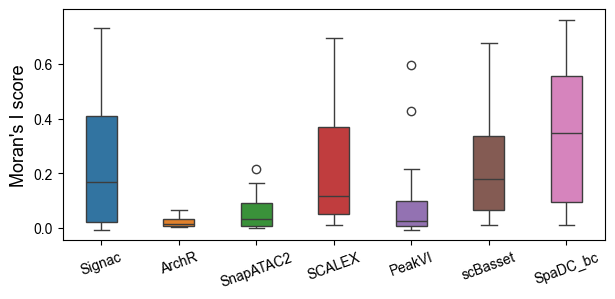

In [6]:
import squidpy as sq
import seaborn as sns
import anndata as ad

# ATAC Moran’s I 
# Signac
Signac_categories = result.obs['Signac'][0:ATAC.n_obs].values
Signac_one_hot_encoded =  pd.get_dummies(Signac_categories)
Signac_one_hot_encoded = Signac_one_hot_encoded * 1

adata_Signac = ad.AnnData(Signac_one_hot_encoded.values)
adata_Signac.obsm['spatial'] = ATAC.obsm['spatial']
sq.gr.spatial_neighbors(adata_Signac, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_Signac, mode="moran")
Signac_moranI = adata_Signac.uns['moranI']['I'].tolist()

# ArchR
ArchR_categories = result.obs['ArchR'][0:ATAC.n_obs].values
ArchR_one_hot_encoded =  pd.get_dummies(ArchR_categories)
ArchR_one_hot_encoded = ArchR_one_hot_encoded * 1

adata_ArchR = ad.AnnData(ArchR_one_hot_encoded.values)
adata_ArchR.obsm['spatial'] = ATAC.obsm['spatial']
sq.gr.spatial_neighbors(adata_ArchR, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_ArchR, mode="moran")
ArchR_moranI = adata_ArchR.uns['moranI']['I'].tolist()

# SnapATAC2
SnapATAC2_categories = result.obs['SnapATAC2'][0:ATAC.n_obs].values
SnapATAC2_one_hot_encoded =  pd.get_dummies(SnapATAC2_categories)
SnapATAC2_one_hot_encoded = SnapATAC2_one_hot_encoded * 1

adata_SnapATAC2 = ad.AnnData(SnapATAC2_one_hot_encoded.values)
adata_SnapATAC2.obsm['spatial'] = ATAC.obsm['spatial']
sq.gr.spatial_neighbors(adata_SnapATAC2, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_SnapATAC2, mode="moran")
SnapATAC2_moranI = adata_SnapATAC2.uns['moranI']['I'].tolist()

# SCALEX
SCALEX_categories = result.obs['SCALEX'][0:ATAC.n_obs].values
SCALEX_one_hot_encoded =  pd.get_dummies(SCALEX_categories)
SCALEX_one_hot_encoded = SCALEX_one_hot_encoded * 1

adata_SCALEX = ad.AnnData(SCALEX_one_hot_encoded.values)
adata_SCALEX.obsm['spatial'] = ATAC.obsm['spatial']
sq.gr.spatial_neighbors(adata_SCALEX, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_SCALEX, mode="moran")
SCALEX_moranI = adata_SCALEX.uns['moranI']['I'].tolist()

# PeakVI
PeakVI_categories = result.obs['PeakVI'][0:ATAC.n_obs].values
PeakVI_one_hot_encoded =  pd.get_dummies(PeakVI_categories)
PeakVI_one_hot_encoded = PeakVI_one_hot_encoded * 1

adata_PeakVI = ad.AnnData(PeakVI_one_hot_encoded.values)
adata_PeakVI.obsm['spatial'] = ATAC.obsm['spatial']
sq.gr.spatial_neighbors(adata_PeakVI, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_PeakVI, mode="moran")
PeakVI_moranI = adata_PeakVI.uns['moranI']['I'].tolist()

# scBasset
scBasset_categories = result.obs['scBasset'][0:ATAC.n_obs].values
scBasset_one_hot_encoded =  pd.get_dummies(scBasset_categories)
scBasset_one_hot_encoded = scBasset_one_hot_encoded * 1

adata_scBasset = ad.AnnData(scBasset_one_hot_encoded.values)
adata_scBasset.obsm['spatial'] = ATAC.obsm['spatial']
sq.gr.spatial_neighbors(adata_scBasset, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_scBasset, mode="moran")
scBasset_moranI = adata_scBasset.uns['moranI']['I'].tolist()

# SpaDC_bc
SpaDC_bc_categories = result.obs['SpaDC_bc'][0:ATAC.n_obs].values
SpaDC_bc_one_hot_encoded =  pd.get_dummies(SpaDC_bc_categories)
SpaDC_bc_one_hot_encoded = SpaDC_bc_one_hot_encoded * 1

adata_SpaDC_bc = ad.AnnData(SpaDC_bc_one_hot_encoded.values)
adata_SpaDC_bc.obsm['spatial'] = ATAC.obsm['spatial']
sq.gr.spatial_neighbors(adata_SpaDC_bc, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_SpaDC_bc, mode="moran")
SpaDC_bc_moranI = adata_SpaDC_bc.uns['moranI']['I'].tolist()

# 画图
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'

f, ax = plt.subplots(figsize=(7, 3))

sns.boxplot(data=[Signac_moranI, ArchR_moranI, SnapATAC2_moranI, SCALEX_moranI, PeakVI_moranI, scBasset_moranI, SpaDC_bc_moranI],width=0.4)
ax.set_xticklabels(['Signac', 'ArchR', 'SnapATAC2', 'SCALEX', 'PeakVI', 'scBasset', 'SpaDC_bc'])
plt.xticks(rotation=20) 
plt.ylabel('Moran\'s I score', fontsize=13)
# plt.savefig('figures/integrate_ATAC_moranI.png', dpi=300, bbox_inches='tight')
plt.show()

/home/machuanlong/anaconda3/lib/python3.11/site-packages/scanpy/metrics/_common.py:62: UserWarning: 1 variables were constant, will return nan for these.
  warnings.warn(
/home/machuanlong/anaconda3/lib/python3.11/site-packages/scanpy/metrics/_common.py:62: UserWarning: 1 variables were constant, will return nan for these.
  warnings.warn(
/tmp/ipykernel_1066674/3438720265.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Signac', 'ArchR', 'SnapATAC2', 'SCALEX', 'PeakVI', 'scBasset', 'SpaDC_bc'])


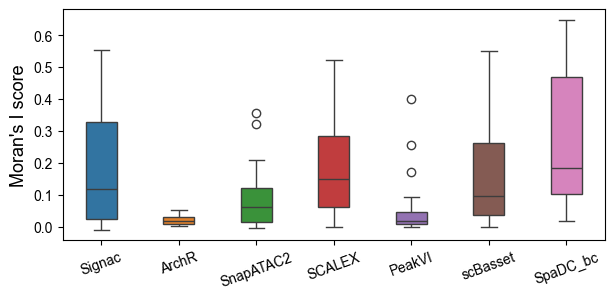

In [7]:
# H3K27ac Moran’s I
# Signac
Signac_categories = result.obs['Signac'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values
Signac_one_hot_encoded =  pd.get_dummies(Signac_categories)
Signac_one_hot_encoded = Signac_one_hot_encoded * 1

adata_Signac = ad.AnnData(Signac_one_hot_encoded.values)
adata_Signac.obsm['spatial'] = H3K27ac.obsm['spatial']
sq.gr.spatial_neighbors(adata_Signac, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_Signac, mode="moran")
Signac_moranI = adata_Signac.uns['moranI']['I'].tolist()

# ArchR
ArchR_categories = result.obs['ArchR'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values
ArchR_one_hot_encoded =  pd.get_dummies(ArchR_categories)
ArchR_one_hot_encoded = ArchR_one_hot_encoded * 1

adata_ArchR = ad.AnnData(ArchR_one_hot_encoded.values)
adata_ArchR.obsm['spatial'] = H3K27ac.obsm['spatial']
sq.gr.spatial_neighbors(adata_ArchR, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_ArchR, mode="moran")
ArchR_moranI = adata_ArchR.uns['moranI']['I'].tolist()

# SnapATAC2
SnapATAC2_categories = result.obs['SnapATAC2'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values
SnapATAC2_one_hot_encoded =  pd.get_dummies(SnapATAC2_categories)
SnapATAC2_one_hot_encoded = SnapATAC2_one_hot_encoded * 1

adata_SnapATAC2 = ad.AnnData(SnapATAC2_one_hot_encoded.values)
adata_SnapATAC2.obsm['spatial'] = H3K27ac.obsm['spatial']
sq.gr.spatial_neighbors(adata_SnapATAC2, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_SnapATAC2, mode="moran")
SnapATAC2_moranI = adata_SnapATAC2.uns['moranI']['I'].tolist()

# SCALEX
SCALEX_categories = result.obs['SCALEX'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values
SCALEX_one_hot_encoded =  pd.get_dummies(SCALEX_categories)
SCALEX_one_hot_encoded = SCALEX_one_hot_encoded * 1

adata_SCALEX = ad.AnnData(SCALEX_one_hot_encoded.values)
adata_SCALEX.obsm['spatial'] = H3K27ac.obsm['spatial']
sq.gr.spatial_neighbors(adata_SCALEX, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_SCALEX, mode="moran")
SCALEX_moranI = adata_SCALEX.uns['moranI']['I'].tolist()

# PeakVI
PeakVI_categories = result.obs['PeakVI'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values
PeakVI_one_hot_encoded =  pd.get_dummies(PeakVI_categories)
PeakVI_one_hot_encoded = PeakVI_one_hot_encoded * 1

adata_PeakVI = ad.AnnData(PeakVI_one_hot_encoded.values)
adata_PeakVI.obsm['spatial'] = H3K27ac.obsm['spatial']
sq.gr.spatial_neighbors(adata_PeakVI, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_PeakVI, mode="moran")
PeakVI_moranI = adata_PeakVI.uns['moranI']['I'].tolist()

# scBasset
scBasset_categories = result.obs['scBasset'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values
scBasset_one_hot_encoded =  pd.get_dummies(scBasset_categories)
scBasset_one_hot_encoded = scBasset_one_hot_encoded * 1

adata_scBasset = ad.AnnData(scBasset_one_hot_encoded.values)
adata_scBasset.obsm['spatial'] = H3K27ac.obsm['spatial']
sq.gr.spatial_neighbors(adata_scBasset, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_scBasset, mode="moran")
scBasset_moranI = adata_scBasset.uns['moranI']['I'].tolist()

# SpaDC_bc
SpaDC_bc_categories = result.obs['SpaDC_bc'][ATAC.n_obs:ATAC.n_obs+H3K27ac.n_obs].values
SpaDC_bc_one_hot_encoded =  pd.get_dummies(SpaDC_bc_categories)
SpaDC_bc_one_hot_encoded = SpaDC_bc_one_hot_encoded * 1

adata_SpaDC_bc = ad.AnnData(SpaDC_bc_one_hot_encoded.values)
adata_SpaDC_bc.obsm['spatial'] = H3K27ac.obsm['spatial']
sq.gr.spatial_neighbors(adata_SpaDC_bc, spatial_key='spatial')
sq.gr.spatial_autocorr(adata_SpaDC_bc, mode="moran")
SpaDC_bc_moranI = adata_SpaDC_bc.uns['moranI']['I'].tolist()

# 画图
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'

f, ax = plt.subplots(figsize=(7, 3))

sns.boxplot(data=[Signac_moranI, ArchR_moranI, SnapATAC2_moranI, SCALEX_moranI, PeakVI_moranI, scBasset_moranI, SpaDC_bc_moranI],width=0.4)
ax.set_xticklabels(['Signac', 'ArchR', 'SnapATAC2', 'SCALEX', 'PeakVI', 'scBasset', 'SpaDC_bc'])
plt.xticks(rotation=20) 
plt.ylabel('Moran\'s I score', fontsize=13)
# plt.savefig('figures/integrate_H3K27ac_moranI.png', dpi=300, bbox_inches='tight')
plt.show()

/home/machuanlong/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/home/machuanlong/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/machuanlong/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/machuanlong/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/machuanlong/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/machuanlong/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Obs

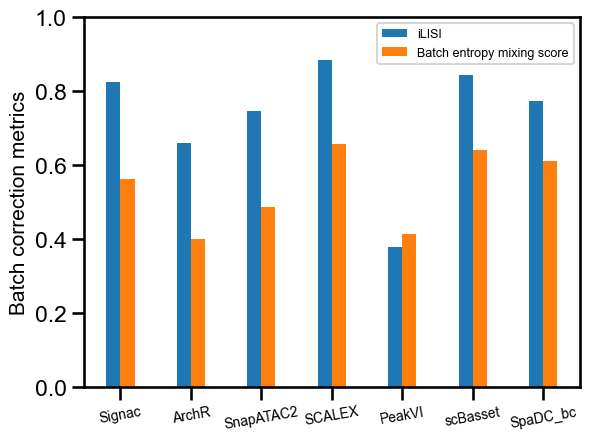

In [11]:
import scib
import numpy as np

# iLISI
Signac_ilisi = scib.me.ilisi_graph(result, batch_key="batch", type_="embed", use_rep="Signac")
ArchR_ilisi = scib.me.ilisi_graph(result, batch_key="batch", type_="embed", use_rep="ArchR")
SnapATAC2_ilisi = scib.me.ilisi_graph(result, batch_key="batch", type_="embed", use_rep="SnapATAC2")
SCALEX_ilisi = scib.me.ilisi_graph(result, batch_key="batch", type_="embed", use_rep="SCALEX")
PeakVI_ilisi = scib.me.ilisi_graph(result, batch_key="batch", type_="embed", use_rep="PeakVI")
scBasset_ilisi = scib.me.ilisi_graph(result, batch_key="batch", type_="embed", use_rep="scBasset")
SpaDC_bc_ilisi = scib.me.ilisi_graph(result, batch_key="batch", type_="embed", use_rep="SpaDC_bc")

# Batch Entropy Score
Signac_bes = SpaDC.batch_entropy_mixing_score(result.obsm['Signac'], result.obs['batch'])
ArchR_bes = SpaDC.batch_entropy_mixing_score(result.obsm['ArchR'], result.obs['batch'])
SnapATAC2_bes = SpaDC.batch_entropy_mixing_score(result.obsm['SnapATAC2'], result.obs['batch'])
SCALEX_bes = SpaDC.batch_entropy_mixing_score(result.obsm['SCALEX'], result.obs['batch'])
PeakVI_bes = SpaDC.batch_entropy_mixing_score(result.obsm['PeakVI'], result.obs['batch'])
scBasset_bes = SpaDC.batch_entropy_mixing_score(result.obsm['scBasset'], result.obs['batch'])
SpaDC_bc_bes = SpaDC.batch_entropy_mixing_score(result.obsm['SpaDC_bc'], result.obs['batch'])

# 画图
x = ['Signac', 'ArchR', 'SnapATAC2', 'SCALEX', 'PeakVI', 'scBasset', 'SpaDC_bc']
y1 = [Signac_ilisi, ArchR_ilisi, SnapATAC2_ilisi, SCALEX_ilisi, PeakVI_ilisi, scBasset_ilisi, SpaDC_bc_ilisi]
y2 = [Signac_bes, ArchR_bes, SnapATAC2_bes, SCALEX_bes, PeakVI_bes, scBasset_bes, SpaDC_bc_bes]

width = 0.2

y1_width = np.arange(len(x)) 
y2_width = y1_width + width

plt.bar(y1_width, y1, width=width, label='iLISI')
plt.bar(y2_width, y2, width=width, label='Batch entropy mixing score')

plt.xticks(y1_width + width/2, labels=x)
plt.xticks(rotation=10)

plt.legend(fontsize=9) 

plt.ylabel('Batch correction metrics', fontsize=15)
plt.yticks(np.arange(0, 1.2, 0.2))
plt.xticks(fontsize=10) 
# plt.savefig('figures/batch_correction_metrics.png')
plt.show()